# **Business Understanding:**

**Objective**:
To analyze customer reviews for McDonald's to gain insights into customer satisfaction and areas of improvement.

What are the common themes or issues mentioned in negative reviews?

How does the review sentiment vary over time? Are there patterns related to specific times or events?

Are there specific stores with notably higher or lower ratings?

What keywords or phrases are commonly associated with positive and negative reviews?

# **Data Understanding**

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/neeharikasinghsjsu/cmpe255assignments/main/DataPreparationAssignment/datasets/McDonald_s_Reviews.csv', encoding='ISO-8859-1')

df

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star
...,...,...,...,...,...,...,...,...,...,...
33391,33392,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",4 years ago,They treated me very badly.,1 star
33392,33393,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",a year ago,The service is very good,5 stars
33393,33394,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",a year ago,To remove hunger is enough,4 stars
33394,33395,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",5 years ago,"It's good, but lately it has become very expen...",5 stars


**Data Summary**

In [2]:
summary = {
    "Data Types": df.dtypes,
    "Missing Values": df.isnull().sum(),
    "Unique Values": df.nunique(),
    "First Row": df.iloc[0]
}

# Basic statistics for numerical columns
stats = df.describe()

summary, stats

({'Data Types': reviewer_id        int64
  store_name        object
  category          object
  store_address     object
  latitude         float64
  longitude        float64
  rating_count      object
  review_time       object
  review            object
  rating            object
  dtype: object,
  'Missing Values': reviewer_id        0
  store_name         0
  category           0
  store_address      0
  latitude         660
  longitude        660
  rating_count       0
  review_time        0
  review             0
  rating             0
  dtype: int64,
  'Unique Values': reviewer_id      33396
  store_name           2
  category             1
  store_address       40
  latitude            39
  longitude           39
  rating_count        51
  review_time         39
  review           22285
  rating               5
  dtype: int64,
  'First Row': reviewer_id                                                      1
  store_name                                              McDonald's
 

**Data Types & Characteristics:**

Most columns are of object (string) data type, with a few being numerical (reviewer_id, latitude, and longitude).

store_name has 2 unique values, with "McDonald's" being the dominant one. There might be a slight variation or typo causing this.

There's only one unique value for category, indicating that all entries pertain to fast-food restaurants.

There are 40 unique store_address entries, representing 40 different McDonald's locations.

Ratings span across 5 unique values, likely corresponding to 1 to 5 stars.

**Missing Values:**

Both latitude and longitude have 660 missing values. This suggests that some stores might not have their geographical coordinates recorded.

**Basic Statistics (Numerical Columns):**

reviewer_id ranges from 1 to 33,396, with no missing values, indicating that there are 33,396 reviews.
The latitude and longitude values cover a wide range, suggesting that the stores are spread across different regions.


**Data Visualization**

Distribution of Ratings: We'll visualize the distribution of ratings to see which ratings are most common.

Frequency of Reviews Over Time: We'll check the frequency of reviews given the provided time descriptions (like "3 months ago").

Distribution of Reviews per Store: We'll see if certain stores have a higher number of reviews than others, which might indicate higher footfall or more vocal customers.

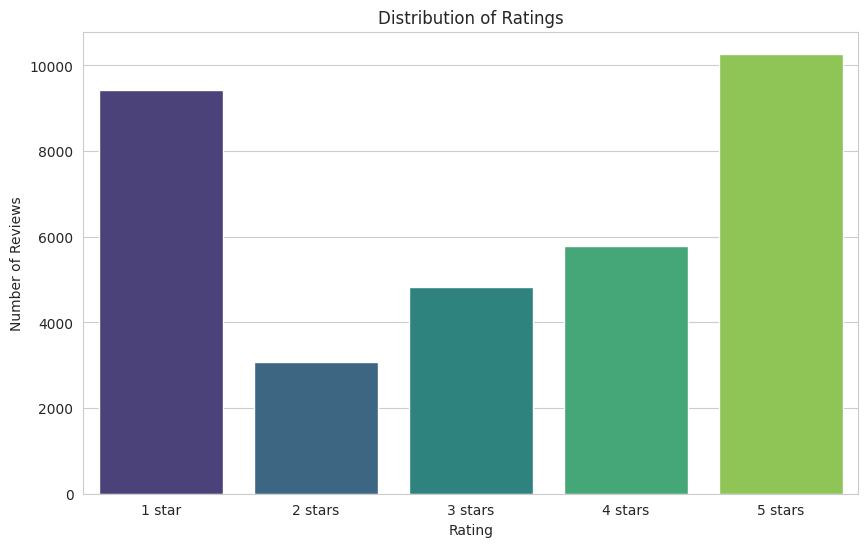

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn for better visualization
sns.set_style("whitegrid")

# Plot the distribution of ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df, order=['1 star', '2 stars', '3 stars', '4 stars', '5 stars'], palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()


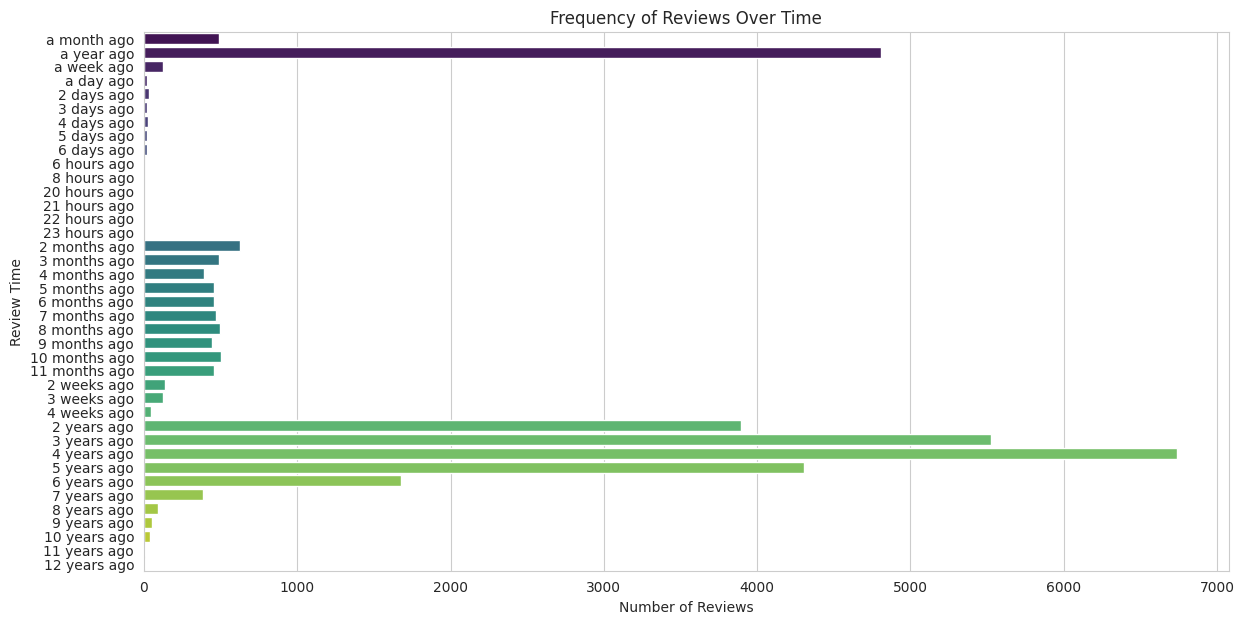

In [4]:
# Extract numerical value and time unit (e.g., "3 months ago" -> (3, "months"))
df['review_time_value'] = df['review_time'].str.extract('(\d+)').astype(float)
df['review_time_unit'] = df['review_time'].str.extract('([a-zA-Z]+)')

# Convert "a month ago", "a day ago", etc. to 1
df['review_time_value'].fillna(1, inplace=True)

# Sort values to ensure the order is correct for visualization
time_order = df.drop_duplicates('review_time').sort_values(
    by=['review_time_unit', 'review_time_value'])['review_time'].tolist()

# Plot the distribution of review times
plt.figure(figsize=(14, 7))
sns.countplot(y='review_time', data=df, order=time_order, palette='viridis')
plt.title('Frequency of Reviews Over Time')
plt.xlabel('Number of Reviews')
plt.ylabel('Review Time')
plt.show()


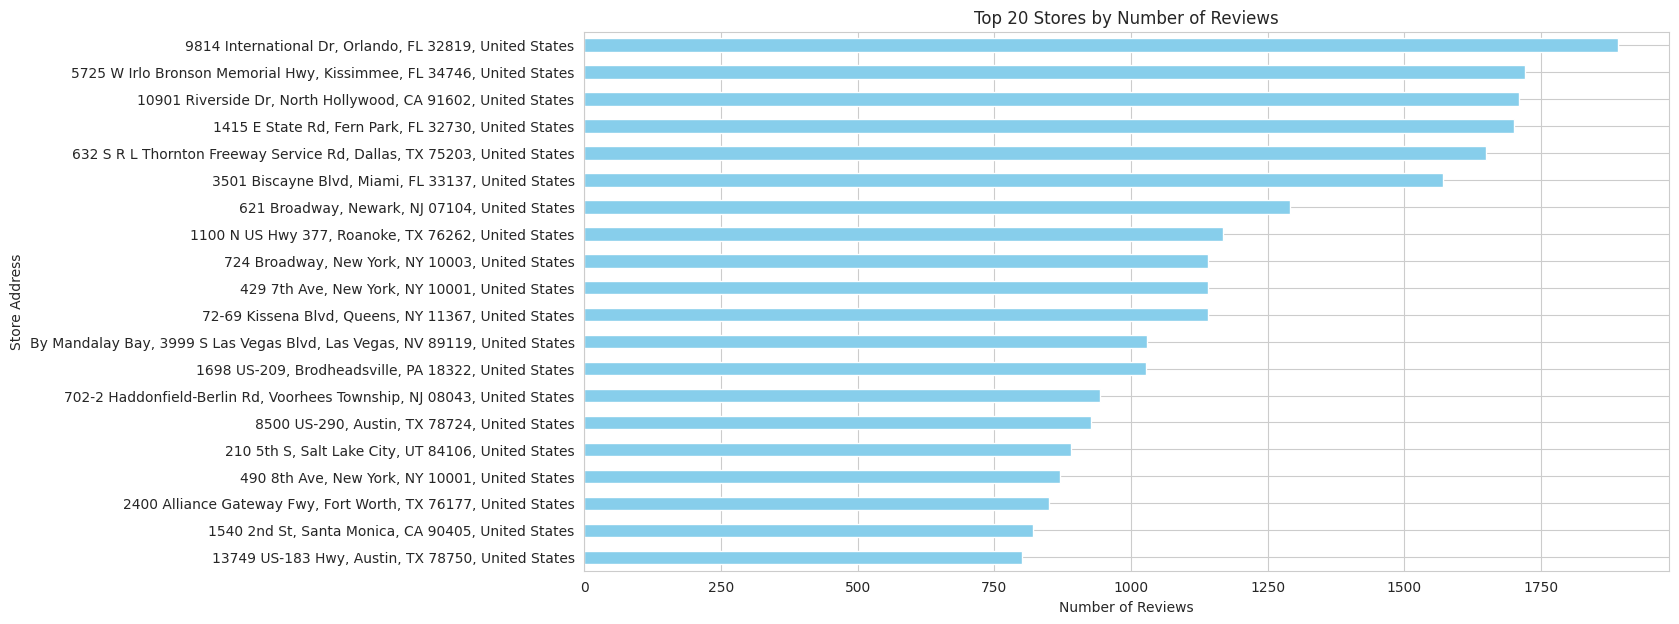

In [5]:
# Group by store_address and count the number of reviews
store_reviews = df.groupby('store_address').size().sort_values(ascending=False)

# Plot the top 20 stores with the highest number of reviews
plt.figure(figsize=(14, 7))
store_reviews.head(20).plot(kind='barh', color='skyblue')
plt.title('Top 20 Stores by Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Store Address')
plt.gca().invert_yaxis()  # Display the store with the highest reviews at the top
plt.show()


**Data Quality Assessment**

Duplicate Entries: Check if there are any repeated reviews or entries in the dataset.

Potential Outliers: Briefly assess if there are any outliers in the numerical columns.

Anomalies in Text Data: A cursory glance at potential anomalies in text-based columns like

In [6]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Number of duplicate rows
num_duplicates = len(duplicate_rows)

num_duplicates


0

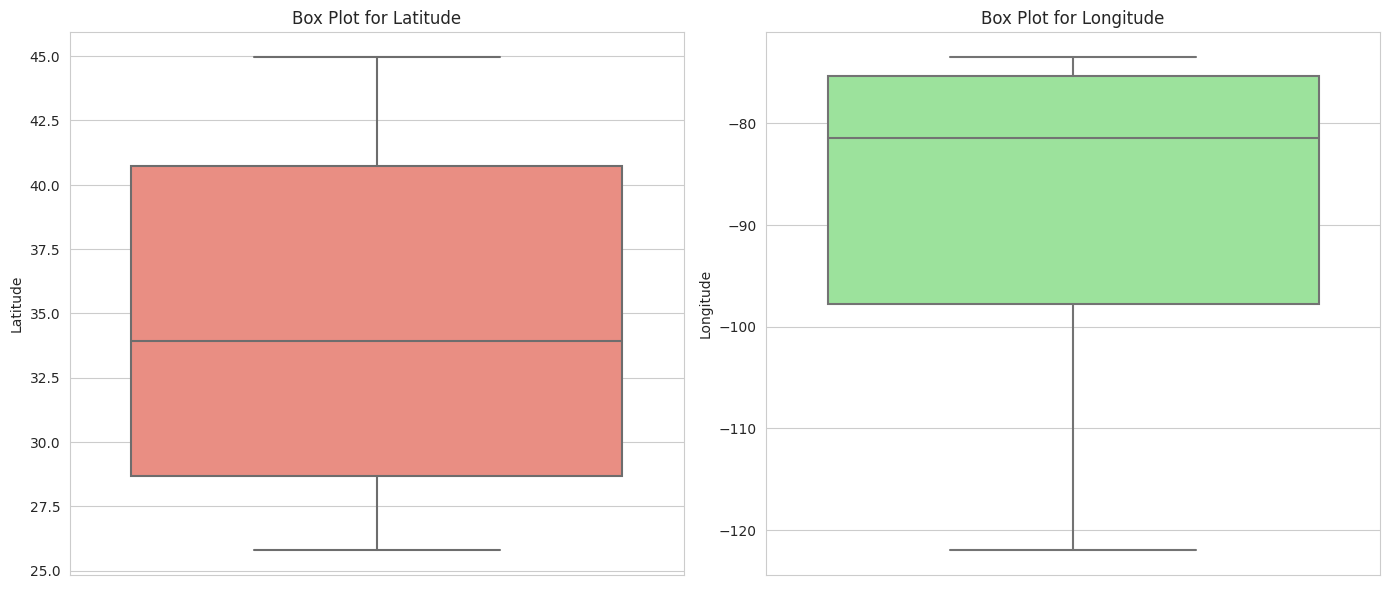

In [10]:
# Plot boxplots for latitude and longitude to check for outliers
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

sns.boxplot(y=df['latitude '], ax=axes[0], color='salmon')
axes[0].set_title('Box Plot for Latitude')
axes[0].set_ylabel('Latitude')

sns.boxplot(y=df['longitude'], ax=axes[1], color='lightgreen')
axes[1].set_title('Box Plot for Longitude')
axes[1].set_ylabel('Longitude')

plt.tight_layout()
plt.show()


In [11]:
# Check unique values in the 'store_name' column
unique_store_names = df['store_name'].unique()

unique_store_names


array(["McDonald's", "ýýýMcDonald's"], dtype=object)

In [12]:
# Correct the 'store_name' column
df['store_name'] = df['store_name'].replace("ýýýMcDonald's", "McDonald's")

# Confirm the correction
corrected_store_names = df['store_name'].unique()

corrected_store_names


array(["McDonald's"], dtype=object)

# **Data Preparation**

In [14]:
# Count the number of rows with missing values in 'latitude' and 'longitude'
missing_lat_lon = df[df['latitude '].isnull() | df['longitude'].isnull()]

# Number of affected rows
num_affected_rows = len(missing_lat_lon)

num_affected_rows


660

In [19]:
# Replace missing values in 'latitude' and 'longitude' with "Not Available"
df['latitude '].fillna('Not Available', inplace=True)
df['longitude'].fillna('Not Available', inplace=True)

# Confirm the changes by checking for any remaining missing values in these columns
missing_values_after_replacement = df[['latitude ', 'longitude']].isnull().sum()

missing_values_after_replacement


latitude     0
longitude    0
dtype: int64

In [20]:
# Calculate review length
df['review_length'] = df['review'].apply(len)

# Convert the 'review_time' descriptions to a numerical representation (number of days since review)
time_conversion = {
    'day': 1,
    'week': 7,
    'month': 30,
    'year': 365
}

df['days_since_review'] = df['review_time_value'].combine(df['review_time_unit'],
                                                         func=lambda value, unit: value * time_conversion.get(unit, 1))

# Display the first few rows to see the new columns
df[['review', 'review_length', 'review_time', 'days_since_review']].head()


,review,review_length,review_time,days_since_review
0,Why does it look like someone spit on my food?...,259,3 months ago,3.0
1,It'd McDonalds. It is what it is as far as the...,237,5 days ago,5.0
2,Made a mobile order got to the speaker and che...,415,5 days ago,5.0
3,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,176,a month ago,1.0
4,"I repeat my order 3 times in the drive thru, a...",312,2 months ago,2.0


In [21]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode the 'rating' column
label_encoder = LabelEncoder()
df['rating_encoded'] = label_encoder.fit_transform(df['rating'])

# Scale the 'review_length' and 'days_since_review' columns
scaler = StandardScaler()
df[['review_length_scaled', 'days_since_review_scaled']] = scaler.fit_transform(
    df[['review_length', 'days_since_review']]
)

# Display the first few rows to see the transformed columns
df[['rating', 'rating_encoded', 'review_length', 'review_length_scaled',
    'days_since_review', 'days_since_review_scaled']].head()


,rating,rating_encoded,review_length,review_length_scaled,days_since_review,days_since_review_scaled
0,1 star,0,259,0.723360,3.0,-0.338952
1,4 stars,3,237,0.603794,5.0,0.578436
2,1 star,0,415,1.571195,5.0,0.578436
3,5 stars,4,176,0.272269,1.0,-1.256340
4,1 star,0,312,1.011407,2.0,-0.797646


# **Modeling**

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Features and target variable
X = df[['review_length_scaled', 'days_since_review_scaled']]
y = df['rating_encoded']

# Split the data into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

accuracy, classification_rep


(0.4589280367302126,
 '              precision    recall  f1-score   support\n\n      1 star       0.48      0.52      0.50      2837\n     2 stars       0.24      0.11      0.15       940\n     3 stars       0.45      0.29      0.35      1422\n     4 stars       0.42      0.33      0.37      1733\n     5 stars       0.49      0.66      0.56      3087\n\n    accuracy                           0.46     10019\n   macro avg       0.41      0.38      0.39     10019\nweighted avg       0.44      0.46      0.44     10019\n')

# **Evaluation**

Model Evaluation:
Accuracy: The model correctly predicts the rating about
45.89% of the time.

Precision, Recall, and F1-Score: The classification report provides a detailed performance assessment for each rating class:
"1 star" reviews have the highest F1-score at 0.50.

"2 stars" reviews have the lowest F1-score at 0.15 indicating difficulty in correctly classifying these reviews.
